# Python Version of the Forest Fire Model

This cell contains a simple python implementation of the forest fire model, as described in the week 9 video.

The variables in the cell below are the two main parameters of the model, which can be adjusted, as well as the random seed which is used to initialise the random number generator.

In [5]:
import random

# define the size of the (square) grid, and the probability of filling a grid point with a tree
N = 10
p = 0.6

# initialise the random number generator using a fixed seed for reproducibility
seed = 42
random.seed(seed)

The cell below contains the implementation of the model.

Recall that each point on the grid represents a possible site for a tree:
- 0: no tree
- 1: tree is alive
- 2: tree is burning
- 3: tree is burnt

In [6]:
from copy import deepcopy
import time

# start the timer
t0 = time.time()

# we want 2 grids - the currently active one, and the one from the previous time step
# we call those grid_new and grid_old
grid_new = []
grid_old = []

# randomly fill the initial grid with live trees, using probability p
for i in range(N):
    grid_old.append([])
    
    for j in range(N):
        # generate a random floating point number between 0 and 1
        rn = random.random()
      
        # if the random number is less than our probability p, we fill the site with a tree
        if (rn <= p):
            grid_old[i].append(1)
        # otherwise, the site remains empty
        else:
            grid_old[i].append(0)

# set the top row of trees on fire
for i in range(N):
    if (grid_old[0][i] == 1):
        grid_old[0][i] = 2

# initialise the new grid to an empty array
grid_new = [[0 for i in range(N)] for j in range(N)]

# save the complete set of grids - this is only needed so that we can visualise the simulation at the end
all_grids = [grid_old]

# loop over time - this loop will continue until there are no more burning trees
t = 0
burning = True
while burning:
  
    # assume nothing is burning unless we find otherwise below
    burning = False

    # loop over grid points
    for i in range(N):
        for j in range(N):
            
            # first check if this is a previously burning tree, which should change from burning (2) to burnt (3)
            if (grid_old[i][j] == 2):
                grid_new[i][j] = 3
                # modify the loop control variable at the same time
                burning = True
        
            # now check whether this tree is alive
            elif (grid_old[i][j] == 1):
                # in this case, we need to check the status of its neighbours, 
                # paying attention to whether or not we are at the edge
                # we first set each variable to false, to cover the case where we are at the edge of the cell
                left_burning = False
                if (j > 0):
                    left_burning = (grid_old[i][j-1] == 2)
            
                right_burning = False
                if (j < N-1):
                    right_burning = (grid_old[i][j+1] == 2)
          
                below_burning = False
                if (i < N-1):
                    below_burning = (grid_old[i+1][j] == 2)
          
                above_burning = False
                if (i > 0):
                    above_burning = (grid_old[i-1][j] == 2)
          
                # if any of the neighbours are burning, set this tree on fire
                if (left_burning or right_burning or above_burning or below_burning):
                    grid_new[i][j] = 2
                else:
                    grid_new[i][j] = 1
        
            # if there is no tree or it is already burnt, the status remains the same
            else:
                grid_new[i][j] = grid_old[i][j]
        
    # increase the time counter
    t += 1
    
    # save a copy of the grid for plotting
    all_grids.append(deepcopy(grid_new))
    
    # the current grid will become the old grid in the next step
    grid_old = deepcopy(grid_new)
    
print("Fire burned out after "+str(t)+" steps")

# end timer
t1 = time.time()
total = t1 - t0
print (f"Total time taken = {total} s")

Fire burned out after 17 steps
Total time taken = 0.00 s


This cell contains a simple animation of the model.

NameError: name 'N' is not defined

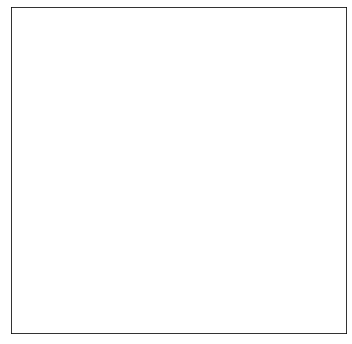

In [1]:
# %matplotlib notebook

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# function to display the grid of trees
def plot_grid(ax, grid):
    import numpy as np
    
    # define the colour palette
    palette = np.array([[255, 255, 255], # white - no tree
                        [0, 255, 0], # green - living tree
                        [255, 0, 0], # red - burning tree
                        [0, 0, 0]]) # black - burnt tree

    RGB = palette[np.array(grid)]
    ax.imshow(RGB)
    fig.canvas.draw()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.title('Forest Fire Model for $N$='+str(N)+', $p$='+str(p)+'\n and random seed='+str(seed))

# display the saved grid from each time step
for grid in all_grids:
    plot_grid(ax, grid)
    # pause to allow the plot to load - this parameter enables you to adjust the speed of the animation
    time.sleep(1)